In [ ]:
# Politican pipeline 
import plotly.plotly as py
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
import pickle
from bqplot import *
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
#ht_df.Count
from scipy.misc import imread



In [ ]:
def hash_tag_sent_build(df):
    hashtags = {}
    hts = df.hashtags.values
    pos_proba = df.pos_proba.values
    classify_rat = 0
    for i in tqdm(range(len(hts))):
        tmp_tag = list(eval(hts[i]))
        if len(tmp_tag) > 0:
            classify_rat +=1
            for j in tmp_tag:
                if j not in hashtags:
                    hashtags[j] = {0:0, 1:1, 'Count':0}
                hashtags[j][0] += (1- pos_proba[i])
                hashtags[j][1] += pos_proba[i]
                hashtags[j]['Count']+=1
    ret_df =  pd.DataFrame.from_dict(hashtags, orient='index').sort_values("Count", ascending=False)
    ret_df['pos'] = ret_df[1] / ( ret_df[0] +  ret_df[1])
    ret_df['neg'] = ret_df[0]/( ret_df[0] +  ret_df[1])
    return ret_df#.loc[ret_df["Count"] > 1]


In [ ]:
# set the user 
# Charlie Baker Example
#user = 'MassGovernor'
user = 'realDonaldTrump'
#user = 'SenWarren'
#user = 'BarackObama'
#users = ['BarackObama', 'realDonaldTrump', 'MassGovernor','SenWarren' ]
orientation = 'right'
def make_cloud(user, orientation='right'):
    data_file = '{}_sentiment_data.csv'.format(user)
    hash_data = '{}_hashtags.pkl'.format(user)
    macro_sent_data = '{}_sent_stats.pkl'.format(user)
    data_path = '../Twitter_to_vec/user_tweets/'
    # orientation of twitter image
    df = pd.read_csv(data_path + user + "/" + data_file)
    ht_df = hash_tag_sent_build(df)
    twitter_mask = imread('./twitter_mask_{}.png'.format(orientation), flatten=True)
    wordcloud = WordCloud(
        background_color= None, #'#1dcaff',
        font_path='/Library/Fonts/Arial.ttf',
        relative_scaling =.25,
        mode='RGBA',
        max_words=2000,
        width=1800,
        height=1400,
        colormap='Blues_r',
        mask=twitter_mask,
        max_font_size=40, 
        random_state=42,
    ).generate_from_frequencies(dict(ht_df.Count))
    print(wordcloud)
    fig = plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, )
    plt.axis('off')
    plt.show()
    fig.savefig( data_path + user + "/"+ "{}_{}_word_cloud.png".format(user, orientation), dpi=900, transparent=True)
    return ht_df

In [4]:
users = 'AustinScottGA08 SenatorEnzi RepAndyBiggsAZ GovernorQuinn SenBobCorker RepAndyHarrisMD RepThompson RepRutherfordFL repsandylevin JuliaBrownley26 RepDougCollins MacTXPress RepAndreCarson GovKitz RepDebDingell PattyMurray KYComer sethmoulton RepDonBacon RepMcClintock SenHydeSmith RepKihuen RepJimmyGomez RepMcNerney RepHultgren CongPalazzo SenGillibrand PeterRoskam SenRonJohnson TXRandy14 Clyburn DarrellIssa RepRodBlum RepMaxineWaters boblatta RepCardenas BradSherman RepRickAllen RepTomGarrett RepKayGranger HFACDemocrats JimLangevin SenatorBurr RepMikeTurner RepMarciaFudge SenatorTimScott SenatorRisch RepRoKhanna RepSeanMaloney RepMGriffith SenateDems TGowdySC SenDuckworth RepSamGraves SenDanSullivan dinatitus lisamurkowski RepGraceMeng AppropsDems WaysandMeansGOP DalrympleforGov SenPatRoberts RepAlexMooney RodneyDavis RepConorLamb SenJeffMerkley RepBobGibbs davereichert RepSinema DaveEHeineman RepBera HouseBudgetDems GovernorDeal RepLukeMesser RepValDemings RepJohnYarmuth RepJudyChu RepAlLawsonJr GovPeterShumlin RepTedLieu RepComstock SenatorTester JimPressOffice Call_Me_Dutch VernBuchanan RepSusanDavis SenSanders repdavidscott CoryBooker RepVisclosky SenatorDurbin SenatorCantwell SenDeanHeller SenStabenow MikeKellyPA RepDianeBlack JudgeTedPoe RepJuanVargas RepGoodlatte RepDavidEPrice RepDWStweets SenCortezMasto RepLujanGrisham NydiaVelazquez FrankPallone RepJoeWilson EdWorkforce SenSherrodBrown JeffFortenberry SASCMajority SenateBudget RepRooney RepLowenthal RepJasonLewis USRepLong RepRichardNeal RosLehtinen RepThomasMassie RepEvanJenkins rosadelauro RepJBridenstine RepublicanStudy RoyBlunt USRepKCastor RepBlainePress ConawayTX11 RepFilemonVela SenJoniErnst CongressmanHice RepMikeJohnson RepStephMurphy DrNealDunnFL2 BobbyScott HouseAdmnGOP RepTomMacArthur RepFredUpton RepJohnLarson RepBuddyCarter repdinatitus JECDems SenJohnBarrasso RepSteveChabot SenJohnMcCain RepRoybalAllard NitaLowey RepHankJohnson HispanicCaucus RepMcGovern EnergyGOP RepFrenchHill RepStephenLynch JaredHuffman repdonyoung RepBarbaraLee RepAndyBarr RepKarenBass SenShelby USRepRodney SenatorHeitkamp JohnBoozman RepKathleenRice ScottWalker RepKenMarchant SenBlumenthal replouiegohmert SenatorShaheen RepMarshall RepBillFlores SenToomey RepWesterman keithellison SciCmteDems RepMcCaul RepDaveBrat SenatorRounds MarkPocan RepJayapal edworkforcedems RepTomEmmer RepChuck RepJeffries rep_stevewomack RepCarbajal senorrinhatch RepAnthonyBrown RepJohnDuncanJr RepJoeBarton RepKClark LindseyGrahamSC RepDrewFerguson CongressmanRaja RepAmata RepPaulCook RepKHandel RepYvetteClarke RepGaramendi FrankDLucas RepTomRice RepTrentKelly RepLoisFrankel SenSasse SenToddYoung HouseForeign NancyPelosi OversightDems TransportDems SenMarkey SteveDaines RepChrisCollins BettyMcCollum04 GovRBentley RepRaskin RepGrothman SenAlexander SenateDoctors CongressmanRuiz GovernorCorbett RepFrankLucas RepGregoryMeeks DevinNunes CongCulberson RepLaHood Gov_Martinez SenatorMenendez RepGonzalez RepByrne gracenapolitano HouseAgNews GovernorVA HurdOnTheHill RepTimRyan JudgeCarter SenatorCollins MarkWarner RepPeteKing RepCuellar SenDonnelly RepShimkus RepLeeZeldin RepMiaLove Jim_Jordan RepMarthaRoby SenCapito RepDwightEvans maziehirono RepAdamSmith RepGuthrie repmarkpocan brianschweitzer RepGeneGreen RepRubenGallego WaysMeansCmte GreggHarper Rep_Hunter InhofePress McConnellPress RepLarryBucshon HASCDemocrats RepMikeBishop RoKhanna DWStweets RepDarrenSoto dscc RepVeasey congbillposey RepZoeLofgren LamarSmithTX21 GovernorMarkell HASCRepublicans RepLoudermilk RepMcEachin MartinHeinrich RepHastingsFL RepAdamSchiff RepWalberg RepJaredPolis RepRichHudson DrPhilRoe RepSarbanes repcleaver RepPeteAguilar JECRepublicans repblumenauer DorisMatsui TulsiPress RepRonEstes timkaine marcorubio NormaJTorres RepJeffDuncan RepBrianBabin RepHartzler RepLipinski RepJasonSmith GovJayNixon RepJeffDenham nikiinthehouse RepLaMalfa SteveScalise RepEdRoyce RepJimBanks RepDonaldPayne SenBillNelson RepAbraham RepBrendanBoyle JohnKasich RepHalRogers RepDanKildee RepHuizenga SenatorLeahy RepMattGaetz ChrisVanHollen USRepGaryPalmer RepRobBishop RepScottPeters jahimes PatrickMcHenry RepRussell Tim_Walz RepMullin SenCoonsOffice NYGovCuomo SenBobCasey RepKevinBrady GovMattBevin TerryBranstad GKButterfield SpeakerRyan RepJohnFaso RepMoolenaar RepEspaillat RepJohnKatko GovHerbert repjohnlewis HouseHomeland SenatorHassan RepSheaPorter RepLindaSanchez RepBost GovMalloyOffice TomRooney senrobportman stabenow brianschatz clairecmc RepDannyDavis SenatorTomUdall Robert_Aderholt virginiafoxx RepBRochester RepCheri KenCalvert RepRohrabacher RepLouCorrea amyklobuchar RepAnnaEshoo RepLawrence HouseJudDems SteveKingIA RepMikeRogersAL CongMikeSimpson RepMarkWalker RepGarretGraves RepTerriSewell HouseGOP RepJackyRosen RepTedYoho SenatorCardin StaceyPlaskett RepRonKind RepMarcyKaptur RobWittman JoaquinCastrotx SenMikeLee RepDelBene RepPittenger HaleyBarbour SenatorLankford RepSchrader RepRatcliffe RepJimRenacci SenWhitehouse HouseScience MarshaBlackburn RepMoBrooks RepMcKinley JacksonLeeTX18 SenateAgDems ButchOtter RepKenBuck RepDavidKustoff SusanWBrooks RepEliotEngel RepLoBiondo RepJoeCourtney johnculberson RepBrianHiggins SenThomTillis EnergyCommerce RepLloydDoggett BillCassidy repdavetrott RepJimmyPanetta SenSchumer RepSanfordSC DesJarlaisTN04 RepErikPaulsen SteveKnight25 RepDianaDeGette SenateMajLdr RepPaulTonko RepAdams RepBonnie JerryMoran MarioDB RepCummings RepMaloney BillPascrell RepTomSuozzi RepArrington RepCharlieCrist HouseCommerce SenTinaSmith Transport CongressmanGT RepEBJ RepBillJohnson BetoORourke MassGovernor RepTedDeutch CongBoyle RepDevinNunes RepSchneider SenFeinstein SeanParnellAK SenatorFischer DonaldNorcross RepHuffman SenKamalaHarris SenateBanking SenJohnThune RepDonBeyer repbenraylujan USRepKeating RepTomReed SanfordBishop PeteSessions SenJackReed WhipHoyer RepBobbyRush SenatorCarper RepWilson RepCartwright FinancialCmte RepChrisSmith RepSpeier HouseVetAffairs RepRichmond LacyClayMO1 RepMikeCoffman RonWyden RepBradWenstrup RepEsty GovRickSnyder RepStefanik RepSwalwell DougLaMalfa SenAngusKing RepNewhouse SenatorWicker hickforco RepWebster RepAlGreen RepLizCheney RepPeteOlson Raul_Labrador RepGallagher GOPLeader SenWarren SenJohnHoeven RepChrisStewart RepPeterDeFazio Sen_JoeManchin SenDougJones RepDeSaulnier RepKevinCramer RepGwenMoore RepClayHiggins TomColeOK04 GovMaryFallin EnergyDems daveloebsack RepRickLarsen RepRickCrawford RepBeatty GovJeffColyer BennieGThompson RepJohnConyers RulesReps RepSeanDuffy ToddRokita WarrenDavidson MarkAmodeiNV2 KeithRothfus RepMarkMeadows RepRaulGrijalva RepKevinYoder RepWalterJones JohnCarneyDE RepKinzinger justinamash SenTedCruz RepMarkTakano jaredpolis PatTiberi BrianSandoval RepMikeCapuano RepMikeQuigley RepJackBergman RepTimWalz JeffFlake cathymcmorris RepTrey RandPaul RepJenniffer GovWalker RepCohen SenatorBaldwin RepLanceNJ7 janschakowsky repjimcooper RepAnnWagner RepRobWoodall RepSmucker RepHanabusa RobinLynneKelly RepPerlmutter RepJerryNadler MikeCrapo RepGusBilirakis DanaRohrabacher SenatorIsakson JimInhofe RepJoshG davidcicilline SenCoryGardner USRepMikeDoyle USRepRickNolan RepDLamborn MEGovernorNews RepMcSally RepPaulMitchell RepStevePearce RepBrady RepTedBudd SenTomCotton RepGosar RepDavidYoung SenateGOP repgregwalden RepDavid SenGaryPeters IndianCommittee RepTipton RepPoliquin RepScottTaylor RepLynnJenkins SDGovDaugaard BillHaslam louiseslaughter RepCicilline RepHensarling RepAnnieKuster SamsPressShop BobMcDonnell JerryBrownGov RepBillFoster RepRWilliams RepDennyHeck RepBrianFitz GovMarkDayton RepRobinKelly RepOHalleran PrayerCaucus ChuckGrassley PeterWelch RepMimiWalters neilabercrombie RepTomMarino EleanorNorton RepTenney RepDennisRoss GovGregoire RepScottPerry SenBrianSchatz RepRalphNorman RepRyanCostello BobbyJindal dandonovan_ny RepJohnDelaney RepWalorski GovChristie ChrisCoons OHPressSec michaelcburgess RepTomGraves GrahamBlog GerryConnolly GovAbbott HomelandDems SenBennetCO chelliepingree RepHolding MikeBeebeAR sendavidperdue HouseDemocrats RepDeSantis ChrisMurphyCT RepDavidRouzer RepJoeKennedy aguilarpete RepDerekKilmer RepBrianMast RepGutierrez RepBillShuster RepDaveJoyce GovBrewer RepDavidValadao repjoecrowley RepJoseSerrano RepBarragan RepJimCosta RepSteveStivers HerreraBeutler RepLouBarletta RepSires RepCurbelo RothfusForPA RepBonamici RepCharlieDent RepAdrianSmith RepBetoORourke SenJohnKennedy RepKristiNoem JohnCornyn'
users = users.split()

In [ ]:
bad = []
print("Starting word cloud generation ")
for user in tqdm(users):
    try:
        make_cloud(user)
    except:
        print("Error at {}".format(user))
        bad += [user]

Starting word cloud generation 


/Users/kbernardini/anaconda3/lib/python3.6/site-packages/wordcloud/wordcloud.py:370: UserWarning:

mask image should be unsigned byte between 0 and 255. Got a float array



Error at SenatorEnzi


In [ ]:
ht_df = make_cloud(user)

In [ ]:
xs = OrdinalScale()
ys = LinearScale()

bar = Bars(x=ht_df.index.values[:10], y=ht_df.pos.values[:10], scales={'x': xs, 'y': ys}, padding=0.2, type='grouped')
xax = Axis(scale=xs)
yax = Axis(scale=ys, orientation='vertical', tick_format='0.0%', grid_lines='solid')
fig = Figure(marks=[bar], axes=[xax, yax], animation_duration=1000, )
fig.layout.width = '1200px'
fig

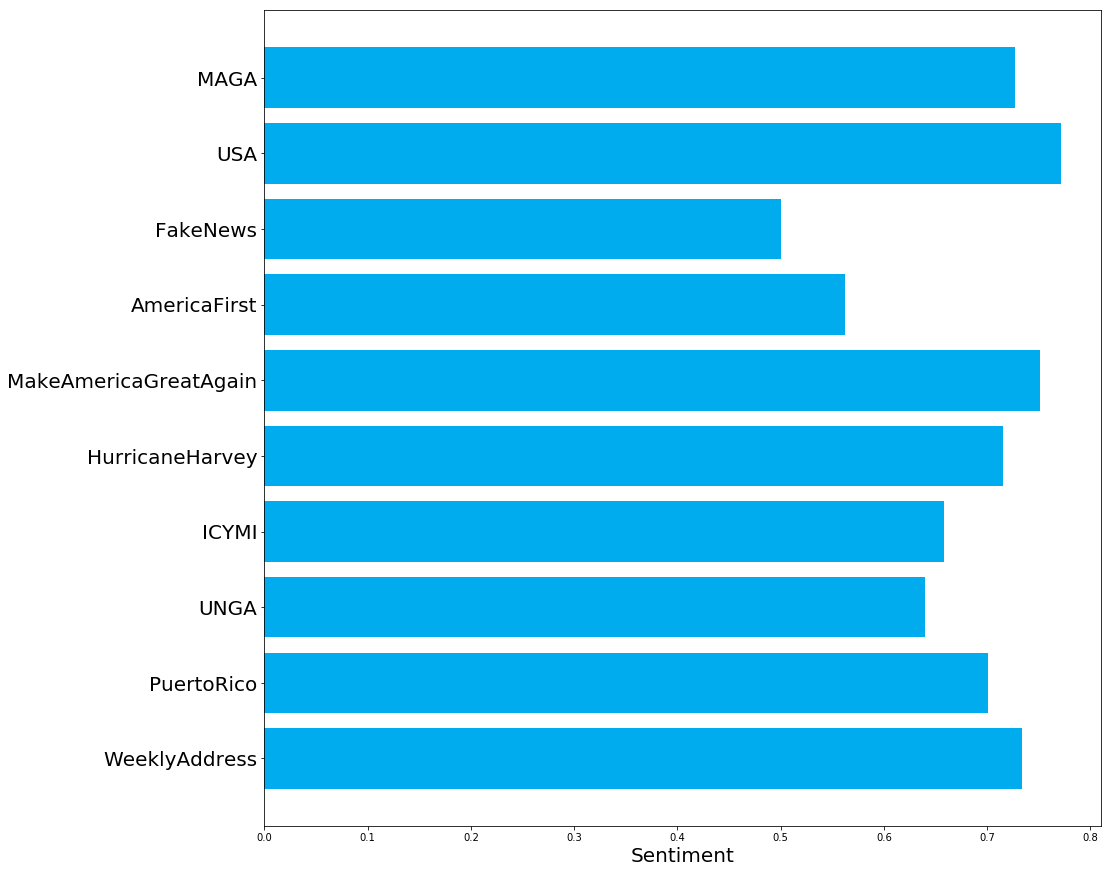

In [65]:
tags = ht_df.index.values[:10]
pos_tags = ht_df.pos.values[:10]
y_pos = np.arange(len(tags))
fig, ax = plt.subplots(figsize=(15,15))
ax.barh(y_pos ,pos_tags, align='center',
        color='#00aced', ecolor='black')
ax.set_yticks(y_pos)
ax.set_xlabel('Sentiment', fontsize=20)
ax.set_yticklabels(tags, fontsize=20)
ax.invert_yaxis()
fig.savefig('{}_bar_chart.png'.format(user), transparent=True)